In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
cycle538 = ["#30a2da","#fc4f30","#e5ae38","#6d904f","#8b8b8b"]

In [32]:
df = pd.read_csv('data/final/results_classification.txt', sep='\t', encoding='utf-8', header=0)

In [33]:
df

,Test Type,Train Data,Test Data,Feature Set,Model,Accuracy,Precision,Recall,F1 Score
0,Intra-Domain,Sporting Event,Sporting Event,Custom,Random Forest Classifier,0.674847,0.701299,0.642857,0.670807
1,Intra-Domain,Sporting Event,Sporting Event,BOW,Random Forest Classifier,0.754601,0.782051,0.726190,0.753086
2,Intra-Domain,Sporting Event,Sporting Event,Custom+BOW,Random Forest Classifier,0.656442,0.705882,0.571429,0.631579
3,Intra-Domain,Technology Conference,Technology Conference,Custom,Random Forest Classifier,0.707071,0.793814,0.669565,0.726415
4,Intra-Domain,Technology Conference,Technology Conference,BOW,Random Forest Classifier,0.691919,0.875000,0.547826,0.673797
5,Intra-Domain,Technology Conference,Technology Conference,Custom+BOW,Random Forest Classifier,0.707071,0.806452,0.652174,0.721154
6,Inter-Domain,Sporting Event,Technology Conference,Custom,Random Forest Classifier,0.665657,0.678261,0.630303,0.653403
7,Inter-Domain,Sporting Event,Technology Conference,BOW,Random Forest Classifier,0.557576,0.609195,0.321212,0.420635
8,Inter-Domain,Sporting Event,Technology Conference,Custom+BOW,Random Forest Classifier,0.642424,0.688000,0.521212,0.593103
9,Inter-Domain,Technology Conference,Sporting Event,Custom,Random Forest Classifier,0.630221,0.694853,0.464373,0.556701


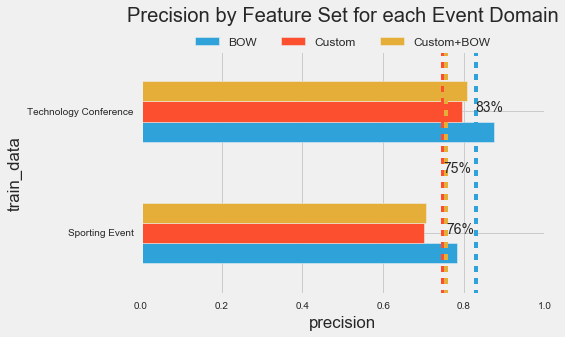

In [34]:
title = 'Precision by Feature Set for each Event Domain'

fig, ax = plt.subplots(figsize=(8,5))

groups = df[df['Test Type'] == 'Intra-Domain'].groupby(['Train Data', 'Feature Set'])['Precision'].mean()
means = groups.unstack().mean()

groups.unstack().plot(kind='barh', ax=ax)
plt.vlines(x=means.values, ymin=-2, ymax=12, colors=cycle538[:3], linestyle='--')
ax.set_xlim(0,1)

for i,mean in enumerate(means):
    plt.text(mean,1-(i*.5), '%.f%%' % (100*mean))

plt.xlabel('precision')
plt.ylabel('train_data')
plt.title(title, y=1.1)
plt.legend(markerscale=2, fontsize=12, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)
fig = plt.gcf()
plt.tight_layout()
plt.show()
fig.savefig('images/summaryeval_%s.png' % title.replace(' ', '_'))

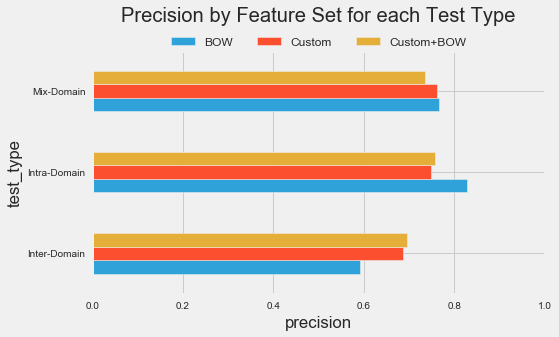

In [35]:
title = 'Precision by Feature Set for each Test Type'

fig, ax = plt.subplots(figsize=(8,5))

groups = df.groupby(['Test Type', 'Feature Set'])['Precision'].mean()

groups.unstack().plot(kind='barh', ax=ax)
ax.set_xlim(0,1)

plt.xlabel('precision')
plt.ylabel('test_type')
plt.title(title, y=1.1)
plt.legend(markerscale=2, fontsize=12, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)
fig = plt.gcf()
plt.tight_layout()
plt.show()
fig.savefig('images/summaryeval_%s.png' % title.replace(' ', '_'))